# Credits to Zero to Mastery Online courses and the instructor Daniel Bourke
https://academy.zerotomastery.io/courses/
# Course Notes
https://github.com/mrdbourke/tensorflow-deep-learning

Now we are on final MvP goal.
Our goal is to be able to classify 35 food classes with transfer learning and hopefully we can achieve at least 80% validation accuracy

## Setup helper functions

In [ ]:
## Get the function ipynb file for reusing of codes
!wget https://github.com/DSstore/AIP/raw/main/functions.ipynb

--2022-02-22 05:42:12--  https://github.com/DSstore/AIP/raw/main/functions.ipynb
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DSstore/AIP/main/functions.ipynb [following]
--2022-02-22 05:42:12--  https://raw.githubusercontent.com/DSstore/AIP/main/functions.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10225 (10.0K) [text/plain]
Saving to: ‘functions.ipynb’

functions.ipynb     100%[===================>]   9.99K  --.-KB/s    in 0s      

2022-02-22 05:42:12 (64.4 MB/s) - ‘functions.ipynb’ saved [10225/10225]



In [ ]:
#Install import_ipynb function in order to use ipynb as seperate function calls 
!pip install import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=59a815fd03387e6b893f86fd083f40c7f2026469c8c8958627a0d3196159fea3
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb


In [ ]:
import import_ipynb
import functions as fn

importing Jupyter notebook from functions.ipynb
16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
import zipfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Unzip the downloaded file
def unzip_data(filename):
  """
  Utility function to unzip a zipped file.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [ ]:
# Get data
import zipfile

# Already formatted in standard image classification directory style
!wget https://storage.googleapis.com/sgfood/SG_Food_35_Classes.zip

unzip_data("SG_Food_35_Classes.zip")

--2022-02-22 05:42:31--  https://storage.googleapis.com/sgfood/SG_Food_35_Classes.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.112, 142.251.45.112, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1057612926 (1009M) [application/x-zip-compressed]
Saving to: ‘SG_Food_35_Classes.zip’

SG_Food_35_Classes. 100%[===================>]   1009M  58.7MB/s    in 16s     

2022-02-22 05:42:48 (62.0 MB/s) - ‘SG_Food_35_Classes.zip’ saved [1057612926/1057612926]



In [ ]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("SG_Food_35_Classes"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'SG_Food_35_Classes'.
There are 35 directories and 0 images in 'SG_Food_35_Classes/train'.
There are 0 directories and 75 images in 'SG_Food_35_Classes/train/popiah'.
There are 0 directories and 75 images in 'SG_Food_35_Classes/train/bak kut teh'.
There are 0 directories and 75 images in 'SG_Food_35_Classes/train/fried carrot cake'.
There are 0 directories and 75 images in 'SG_Food_35_Classes/train/wanton mee'.
There are 0 directories and 75 images in 'SG_Food_35_Classes/train/kiwi'.
There are 0 directories and 75 images in 'SG_Food_35_Classes/train/claypot rice'.
There are 0 directories and 75 images in 'SG_Food_35_Classes/train/nasi lemak'.
There are 0 directories and 75 images in 'SG_Food_35_Classes/train/mango'.
There are 0 directories and 75 images in 'SG_Food_35_Classes/train/bak chor mee'.
There are 0 directories and 75 images in 'SG_Food_35_Classes/train/banana'.
There are 0 directories and 75 images in 'SG_Food_35_Classes/train/char kway

In [ ]:
# Setup data inputs

train_dir = "SG_Food_35_Classes/train/"
test_dir = "SG_Food_35_Classes/test/"

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
train_filepaths = list(data_dir.glob(r'**/*.jpg'))
test_data_dir = pathlib.Path(test_dir)
test_filepaths = list(test_data_dir.glob(r'**/*.jpg'))
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

In [ ]:
class_names

array(['Hainanese Chicken Rice', 'apple', 'bak chor mee', 'bak kut teh',
       'ban mian soup', 'banana', 'char kway teow', 'chendol',
       'chicken curry noodle', 'claypot rice', 'curry puff',
       'fish head curry', 'fried carrot cake', 'grapes', 'ice kacang',
       'kiwi', 'laksa', 'mango', 'mee hoon kueh', 'mee rebus', 'mee siam',
       'nasi briyani', 'nasi lemak', 'orange', 'oyster omelette', 'pear',
       'pineapple', 'pomegranate', 'popiah', 'prawn noodles soup',
       'roti john', 'roti prata', 'satay', 'wanton mee', 'watermelon'],
      dtype='<U22')

In [ ]:
import pandas as pd
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [ ]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)

In [ ]:
#Checking the d
train_df #75 training images x 35 classes = total images 2625

,Filepath,Label
0,SG_Food_35_Classes/train/nasi lemak/nasi_lemak...,nasi lemak
1,SG_Food_35_Classes/train/ban mian soup/ban mia...,ban mian soup
2,SG_Food_35_Classes/train/bak kut teh/bak_kut_t...,bak kut teh
3,SG_Food_35_Classes/train/laksa/laksa_big_pic65...,laksa
4,SG_Food_35_Classes/train/pineapple/pineapple_t...,pineapple
...,...,...
2620,SG_Food_35_Classes/train/char kway teow/char_k...,char kway teow
2621,SG_Food_35_Classes/train/laksa/laksa_big_pic15...,laksa
2622,SG_Food_35_Classes/train/roti prata/roti_prata...,roti prata
2623,SG_Food_35_Classes/train/roti prata/roti_prata...,roti prata


In [ ]:
test_df #25 test images x 35 classes = total images 875

,Filepath,Label
0,SG_Food_35_Classes/test/satay/satay_test_big_p...,satay
1,SG_Food_35_Classes/test/nasi briyani/nasi briy...,nasi briyani
2,SG_Food_35_Classes/test/bak chor mee/bak_chor_...,bak chor mee
3,SG_Food_35_Classes/test/satay/satay_test_big_p...,satay
4,SG_Food_35_Classes/test/mango/mango_test7.jpg,mango
...,...,...
870,SG_Food_35_Classes/test/bak kut teh/bak kut te...,bak kut teh
871,SG_Food_35_Classes/test/pomegranate/pomegranat...,pomegranate
872,SG_Food_35_Classes/test/curry puff/curry puff_...,curry puff
873,SG_Food_35_Classes/test/mango/mango_test24.jpg,mango


In [ ]:
#Preprocess the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(
                 rotation_range=5,
                 width_shift_range=0.05,
                 height_shift_range=0.05,
                 shear_range=0.2,
                 zoom_range=0.2,
                 fill_mode='nearest',
                 horizontal_flip=True,
                 vertical_flip=False,
                 rescale=1/255)

print("Agumented Training images:")
train_data_augmented = train_datagen_augmented.flow_from_dataframe(dataframe=train_df,
                                                                   x_col='Filepath',
                                                                   y_col='Label',
                                                                   color_mode='rgb',
                                                                  target_size=IMAGE_SHAPE,
                                                                  batch_size=BATCH_SIZE,
                                                                  class_mode='categorical')


train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)




print("Training images:")
train_data = train_datagen.flow_from_dataframe(dataframe=train_df,
                                              x_col='Filepath',
                                              y_col='Label',
                                              color_mode='rgb',
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode='categorical')

print("Testing images:")
test_data = test_datagen.flow_from_dataframe(dataframe=test_df,
                                              x_col='Filepath',
                                              y_col='Label',
                                              color_mode='rgb',
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode='categorical')



Agumented Training images:
Found 2625 validated image filenames belonging to 35 classes.
Training images:
Found 2625 validated image filenames belonging to 35 classes.
Testing images:
Found 875 validated image filenames belonging to 35 classes.


In [ ]:
# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [ ]:
# Create tensorboard callback (functionized because need to create a new one for each model)
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:
import tensorflow_hub as hub
def create_model(model_url, num_classes=35):  #num_classes refers to number of inputs
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer      
  ])

  return model

# *Model 1*

In [ ]:
# Create model
efficientnet_model_1 = create_model(model_url=efficientnet_url, # use EfficientNetB0 TensorFlow Hub URL
                                  num_classes=35)

# Compile EfficientNet model
efficientnet_model_1.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit EfficientNet model 
efficientnet_history_1 = efficientnet_model_1.fit(train_data, 
                                              epochs=5, # train for 5 epochs
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                                     # Track logs under different experiment name
                                                                                     experiment_name="efficientnetB0")])

Saving TensorBoard log files to: tensorflow_hub/efficientnetB0/20220222-042400
Epoch 1/5
18/83 [=====>........................] - ETA: 54s - loss: 3.1994 - accuracy: 0.1736

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


36/83 [============>.................] - ETA: 41s - loss: 2.7267 - accuracy: 0.3524

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


83/83 [==============================] - 100s 990ms/step - loss: 2.0523 - accuracy: 0.5615 - val_loss: 1.2367 - val_accuracy: 0.7714
Epoch 2/5
83/83 [==============================] - 80s 972ms/step - loss: 0.8322 - accuracy: 0.8545 - val_loss: 0.8491 - val_accuracy: 0.8080
Epoch 3/5
83/83 [==============================] - 78s 947ms/step - loss: 0.5480 - accuracy: 0.9048 - val_loss: 0.7188 - val_accuracy: 0.8229
Epoch 4/5
83/83 [==============================] - 79s 950ms/step - loss: 0.4233 - accuracy: 0.9223 - val_loss: 0.6314 - val_accuracy: 0.8389
Epoch 5/5
83/83 [==============================] - 78s 942ms/step - loss: 0.3334 - accuracy: 0.9463 - val_loss: 0.5811 - val_accuracy: 0.8423


In [ ]:
efficientnet_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 35)                44835     
                                                                 
Total params: 4,094,399
Trainable params: 44,835
Non-trainable params: 4,049,564
_________________________________________________________________


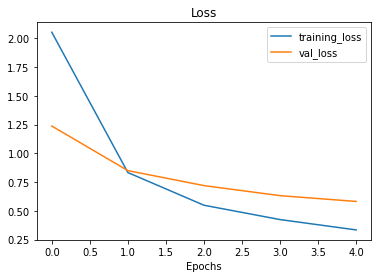

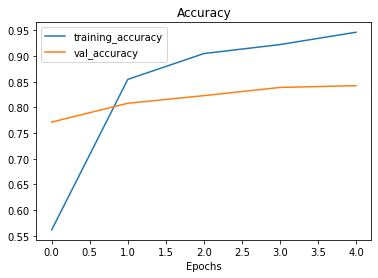

In [ ]:
fn.plot_loss_curves(efficientnet_history_1)

In [ ]:
# Save model_1
efficientnet_model_1.save("efficientnet_model_1_V2_35_classes")

INFO:tensorflow:Assets written to: efficientnet_model_1_V2_35_classes/assets


INFO:tensorflow:Assets written to: efficientnet_model_1_V2_35_classes/assets


In [ ]:
# Save model_1 as h5
efficientnet_model_1.save("efficientnet_model_1_V2_35_classes.h5")

# *Model 2*

In [ ]:
# Create model
efficientnet_model_2 = create_model(model_url=efficientnet_url, # use EfficientNetB0 TensorFlow Hub URL
                                  num_classes=35)

# Compile EfficientNet model
efficientnet_model_2.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit EfficientNet model 
efficientnet_history_2 = efficientnet_model_2.fit(train_data_augmented, 
                                              epochs=5, # train for 5 epochs
                                              steps_per_epoch=len(train_data_augmented),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                                     # Track logs under different experiment name
                                                                                     experiment_name="efficientnetB0")])

Saving TensorBoard log files to: tensorflow_hub/efficientnetB0/20220222-052410
Epoch 1/5
40/83 [=============>................] - ETA: 47s - loss: 2.7246 - accuracy: 0.3483

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


55/83 [==================>...........] - ETA: 30s - loss: 2.4599 - accuracy: 0.4332

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


83/83 [==============================] - 110s 1s/step - loss: 2.1141 - accuracy: 0.5387 - val_loss: 1.2613 - val_accuracy: 0.7634
Epoch 2/5
83/83 [==============================] - 101s 1s/step - loss: 0.9301 - accuracy: 0.8309 - val_loss: 0.8536 - val_accuracy: 0.8080
Epoch 3/5
83/83 [==============================] - 101s 1s/step - loss: 0.6456 - accuracy: 0.8735 - val_loss: 0.7032 - val_accuracy: 0.8309
Epoch 4/5
83/83 [==============================] - 101s 1s/step - loss: 0.5034 - accuracy: 0.9036 - val_loss: 0.6280 - val_accuracy: 0.8309
Epoch 5/5
83/83 [==============================] - 100s 1s/step - loss: 0.4068 - accuracy: 0.9272 - val_loss: 0.5699 - val_accuracy: 0.8503


In [ ]:
efficientnet_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 35)                44835     
                                                                 
Total params: 4,094,399
Trainable params: 44,835
Non-trainable params: 4,049,564
_________________________________________________________________


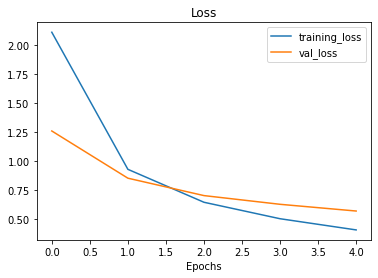

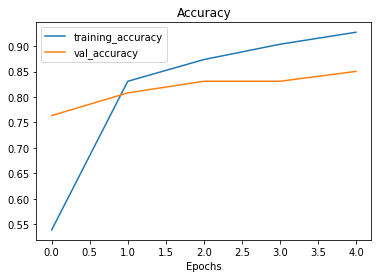

In [ ]:
fn.plot_loss_curves(efficientnet_history_2)

In [ ]:
# Get an image Tensor
!wget -q https://github.com/DSstore/AIP/raw/main/Char-Kway-Teow_1.jpg

In [ ]:
# Save model_2
efficientnet_model_2.save("efficientnet_model_2_V2_35_classes")

INFO:tensorflow:Assets written to: efficientnet_model_2_V2_35_classes/assets


INFO:tensorflow:Assets written to: efficientnet_model_2_V2_35_classes/assets


In [ ]:
# Save model_1 as h5
efficientnet_model_2.save("efficientnet_model_2_V2_35_classes.h5")

# *Model 3* 

In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
# Create model
efficientnet_model_3 = create_model(model_url=efficientnet_url, # use EfficientNetB0 TensorFlow Hub URL
                                  num_classes=35)

# Compile EfficientNet model
efficientnet_model_3.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

#callbacks
checkpointer = ModelCheckpoint(filepath='Transfer_Learning_classification.hdf5', verbose=1, save_best_only=True, save_weights_only=True)
earlystopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=20, mode='auto')
reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, mode='auto')

# Fit EfficientNet model 
efficientnet_history_3 = efficientnet_model_3.fit(train_data_augmented, # only use 10% of training data
                                              epochs=50, # train for 5 epochs
                                              steps_per_epoch=len(train_data_augmented),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                                     # Track logs under different experiment name
                                                                                     experiment_name="efficientnetB0"),
                                                                                      checkpointer, reduceLR, earlystopping])

Saving TensorBoard log files to: tensorflow_hub/efficientnetB0/20220222-055227
Epoch 1/50
 7/83 [=>............................] - ETA: 1:36 - loss: 3.5449 - accuracy: 0.0848

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


82/83 [============================>.] - ETA: 1s - loss: 2.1548 - accuracy: 0.5187

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


83/83 [==============================] - ETA: 0s - loss: 2.1415 - accuracy: 0.5230
Epoch 1: val_loss improved from inf to 1.25132, saving model to Transfer_Learning_classification.hdf5
83/83 [==============================] - 125s 1s/step - loss: 2.1415 - accuracy: 0.5230 - val_loss: 1.2513 - val_accuracy: 0.7714 - lr: 0.0010
Epoch 2/50
83/83 [==============================] - ETA: 0s - loss: 0.9241 - accuracy: 0.8320
Epoch 2: val_loss improved from 1.25132 to 0.85615, saving model to Transfer_Learning_classification.hdf5
83/83 [==============================] - 103s 1s/step - loss: 0.9241 - accuracy: 0.8320 - val_loss: 0.8562 - val_accuracy: 0.8011 - lr: 0.0010
Epoch 3/50
83/83 [==============================] - ETA: 0s - loss: 0.6322 - accuracy: 0.8800
Epoch 3: val_loss improved from 0.85615 to 0.70246, saving model to Transfer_Learning_classification.hdf5
83/83 [==============================] - 102s 1s/step - loss: 0.6322 - accuracy: 0.8800 - val_loss: 0.7025 - val_accuracy: 0.8263

In [ ]:
efficientnet_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 35)                44835     
                                                                 
Total params: 4,094,399
Trainable params: 44,835
Non-trainable params: 4,049,564
_________________________________________________________________


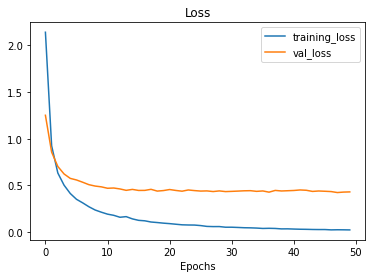

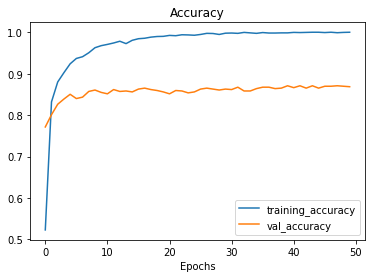

In [ ]:
fn.plot_loss_curves(efficientnet_history_3)

In [ ]:
# Save model_3
efficientnet_model_3.save("efficientnet_model_3_V2_35_classes")

INFO:tensorflow:Assets written to: efficientnet_model_3_V2_35_classes/assets


INFO:tensorflow:Assets written to: efficientnet_model_3_V2_35_classes/assets


In [ ]:
# Save model_3.h5
efficientnet_model_3.save("efficientnet_model_3_V2_35_classes.h5")

In [ ]:
# Authentic Colab 
# (running this will give you a code to authentic your Google Colab instance, keep the code secret)
from google.colab import auth
auth.authenticate_user()

In [ ]:
# Copy model to bucket - https://cloud.google.com/storage/docs/uploading-objects#gsutil 
# Use "-r" for folders (r stands for recursive)
!gsutil cp -r efficientnet_model_3_V2_35_classes gs://food_model

Copying file://efficientnet_model_3_V2_35_classes/saved_model.pb [Content-Type=application/octet-stream]...
Copying file://efficientnet_model_3_V2_35_classes/keras_metadata.pb [Content-Type=application/octet-stream]...
Copying file://efficientnet_model_3_V2_35_classes/variables/variables.index [Content-Type=application/octet-stream]...
Copying file://efficientnet_model_3_V2_35_classes/variables/variables.data-00000-of-00001 [Content-Type=application/octet-stream]...
\
Operation completed over 4 objects/23.3 MiB.                                     


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = fn.load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);
  figure(figsize=(8, 6), dpi=80)

In [ ]:
#Get in some our custom images
# -q is for "quiet"
!wget -q https://github.com/DSstore/AIP/raw/main/Char-Kway-Teow_1.jpg
!wget -q https://github.com/DSstore/AIP/raw/main/Nasi-Lemak-2.jpg
!wget -q https://github.com/DSstore/AIP/raw/main/Springleaf-Prata-Place.jpg
!wget -q https://github.com/DSstore/AIP/raw/main/laksa_soup.jpg
!wget -q https://github.com/DSstore/AIP/raw/main/satay.jpg


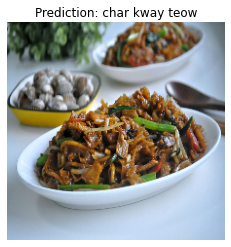

<Figure size 640x480 with 0 Axes>

In [ ]:
# Make a prediction using model_7
pred_and_plot(efficientnet_model_3, "Char-Kway-Teow_1.jpg", class_names)

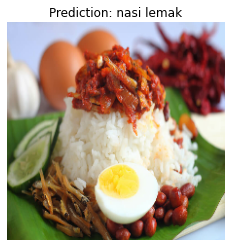

<Figure size 640x480 with 0 Axes>

In [ ]:
# Make a prediction using model_7
pred_and_plot(efficientnet_model_3, "Nasi-Lemak-2.jpg", class_names)

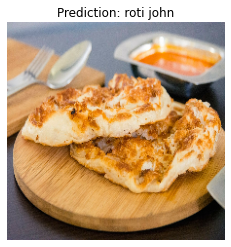

<Figure size 640x480 with 0 Axes>

In [ ]:
# Make a prediction using model_7
pred_and_plot(efficientnet_model_3, "Springleaf-Prata-Place.jpg", class_names)

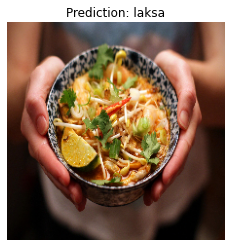

<Figure size 640x480 with 0 Axes>

In [ ]:
# Make a prediction using model_7
pred_and_plot(efficientnet_model_3, "laksa_soup.jpg", class_names)

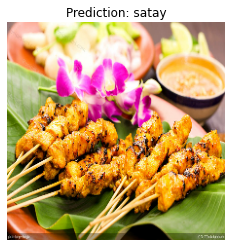

<Figure size 640x480 with 0 Axes>

In [ ]:
# Make a prediction using model_7
pred_and_plot(efficientnet_model_3, "satay.jpg", class_names)